In [1]:
import torch
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# trainarea <- ext(c(-134, -128, 57, 60))

In [4]:
# loading climatologies
prism = xr.open_dataset('/home/sbeale/climatologies/tmax_03_PRISM.nc')
worldclim = xr.open_dataset('/home/sbeale/climatologies/tmax_03_WorldClim_WRF_coarse.nc')
coast = xr.open_dataset('/home/sbeale/climatologies/coast.nc')
dem = xr.open_dataset('/home/sbeale/climatologies/DEM.nc')
lat = xr.open_dataset('/home/sbeale/climatologies/lat.nc')
lon = xr.open_dataset('/home/sbeale/climatologies/lon.nc')


In [8]:
worldclim = worldclim.sel(longitude=slice(-140.81, -113.05))
prism = prism.sel(longitude=slice(-140.81, -113.05))
dem = dem.sel(longitude=slice(-140.81, -113.05))
lat = lat.sel(longitude=slice(-140.81, -113.05))
lon = lon.sel(longitude=slice(-140.81, -113.05))
coast = coast.sel(longitude=slice(-140.81, -113.05))

Text(0.5, 0.01, 'longitude [deg E]')

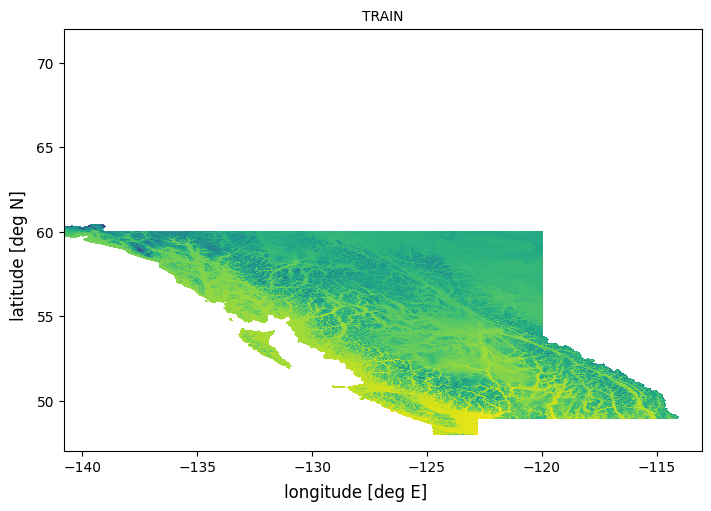

In [9]:
fig, ax = plt.subplots(1, 1, layout='constrained', figsize=(7, 5), sharex=True, sharey=True)

pc1 = ax.pcolormesh(prism.longitude, prism.latitude, prism.tmax, cmap='viridis', label=r'$m$')
ax.set_title(f'TRAIN', fontsize='medium', loc='center')

fig.supylabel('latitude [deg N]')
fig.supxlabel('longitude [deg E]')


In [10]:
prism_tmax = prism['tmax']
worldclim_tmax = worldclim['tmax']
coast_dist = coast['dist']
dem_dem = dem['dem']
lat_lat = lat['lat']
lon_lon = lon['lon']

In [11]:
# calculating mean 

prism_mean = np.nanmean(prism['tmax'])
worldclim_mean = np.nanmean(worldclim['tmax'])
coast_mean = np.nanmean(coast['dist'])
dem_mean = np.nanmean(dem['dem'])
lat_mean = np.nanmean(lat['lat'])
lon_mean = np.nanmean(lon['lon'])

In [12]:
# calculating standard deviation 

prism_std = np.nanstd(prism['tmax'])
worldclim_std = np.nanstd(worldclim['tmax'])
coast_std = np.nanstd(coast['dist'])
dem_std = np.nanstd(dem['dem'])
lat_std = np.nanstd(lat['lat'])
lon_std = np.nanstd(lon['lon'])

In [13]:
print(prism_mean, prism_std)

1.6364753 3.9301772


In [14]:
import csv 

# data rows as dictionary objects 
mydict =[{'var': 'tmax', 'month':3, 'clim': 'prism', 'mean': prism_mean, 'std':prism_std}, 
         {'var': 'tmax', 'month':3, 'clim': 'worldclim', 'mean': worldclim_mean, 'std':worldclim_std}, 
         {'var': 'dist from coast', 'month':3, 'clim': 'prism', 'mean':coast_mean, 'std':coast_std},
         {'var': 'dem', 'month':3, 'clim': 'prism', 'mean':dem_mean, 'std':dem_std},
         {'var': 'lat', 'month':3, 'clim': 'prism', 'mean':lat_mean, 'std':lat_std},
         {'var': 'lon', 'month':3, 'clim': 'prism', 'mean':lon_mean, 'std':lon_std},
         ]

# field names 
fields = ['var','month', 'clim', 'mean', 'std'] 

with open('/home/sbeale/tmax_north_south_train_test/standardization.csv', 'w', newline='') as file: 
    writer = csv.DictWriter(file, fieldnames = fields)

    writer.writeheader() 

    writer.writerows(mydict)

In [60]:
# standardizing all variables 
prism['tmax'] = (prism_tmax - prism_mean)/prism_std
worldclim['tmax'] = (worldclim_tmax - worldclim_mean)/worldclim_std
coast['dist'] = (coast_dist - coast_mean)/coast_std
dem['dem'] = (dem_dem - dem_mean)/dem_std
lat['lat'] = (lat_lat - lat_mean)/lat_std
lon['lon'] = (lon_lon - lon_mean)/lon_std

In [61]:
# selecting slice of upper BC for testing data
min_lon = -128
max_lon = -119
min_lat = 56
max_lat = 61
prism_test = prism.where((prism.latitude <= max_lat) & (prism.latitude >= min_lat) & (prism.longitude >= min_lon) & (prism.longitude <= max_lon), drop=True)
worldclim_test = worldclim.where((worldclim.latitude <= max_lat) & (worldclim.latitude >= min_lat) & (worldclim.longitude >= min_lon) & (worldclim.longitude <= max_lon), drop=True)

coast_test = coast.where((coast.latitude <= max_lat) & (coast.latitude >= min_lat) & (coast.longitude >= min_lon) & (coast.longitude <= max_lon), drop=True)
dem_test = dem.where((dem.latitude <= max_lat) & (dem.latitude >= min_lat) & (dem.longitude >= min_lon) & (dem.longitude <= max_lon), drop=True)
lat_test = lat.where((lat.latitude <= max_lat) & (lat.latitude >= min_lat) & (lat.longitude >= min_lon) & (lat.longitude <= max_lon), drop=True)
lon_test = lon.where((lon.latitude <= max_lat) & (lon.latitude >= min_lat) & (lon.longitude >= min_lon) & (lon.longitude <= max_lon), drop=True)

In [62]:
# replacing cropped values with NaN
prism['tmax'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.NaN
worldclim['tmax'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.NaN

coast['dist'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.NaN
dem['dem'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.NaN
lat['lat'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.NaN
lon['lon'].loc[dict(latitude=slice(max_lat, min_lat), longitude=slice(min_lon, max_lon))] = np.NaN

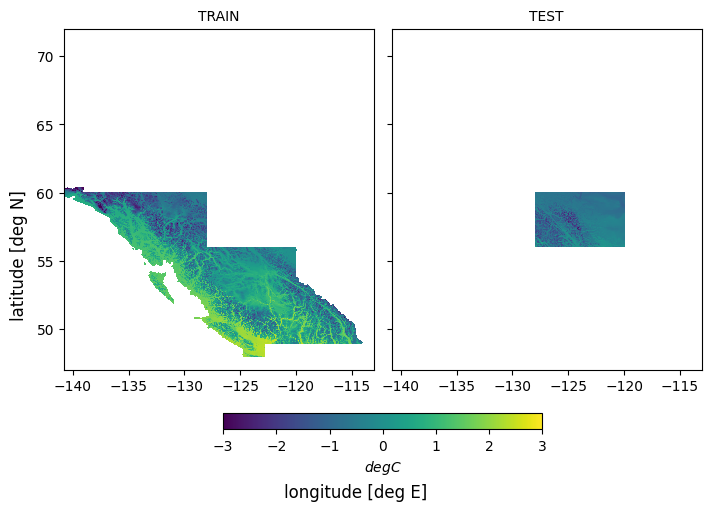

In [63]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(7, 5), sharex=True, sharey=True)

pc1 = ax[0].pcolormesh(prism.longitude, prism.latitude, prism.tmax, cmap='viridis', vmin=-3, vmax=3, label=r'$m$')
ax[0].set_title(f'TRAIN', fontsize='medium', loc='center')

pc1 = ax[1].pcolormesh(prism_test.longitude, prism_test.latitude, prism_test.tmax, cmap='viridis', vmin=-3, vmax=3, label=r'$m$')
ax[1].set_title(f'TEST', fontsize='medium', loc='center')

fig.supylabel('latitude [deg N]')
fig.supxlabel('longitude [deg E]')

fig.colorbar(pc1, shrink=0.5, aspect=20, location='bottom', ax=ax[0:2], label=r'$deg C$')

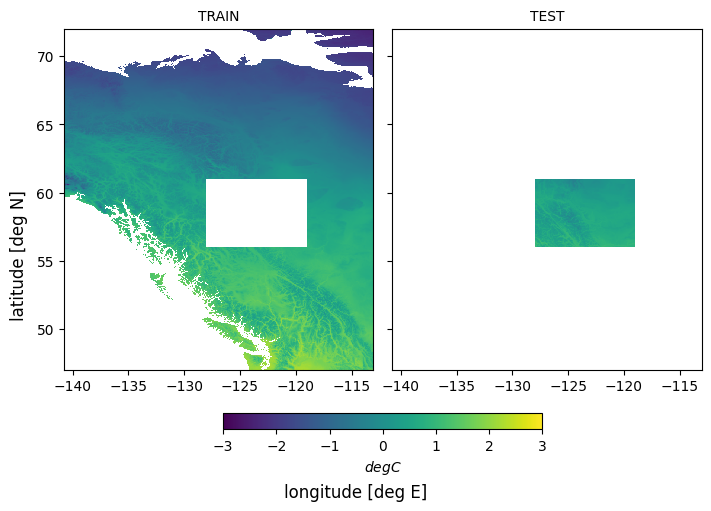

In [64]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(7, 5), sharex=True, sharey=True)

pc1 = ax[0].pcolormesh(worldclim.longitude, worldclim.latitude, worldclim.tmax, cmap='viridis', vmin=-3, vmax=3, label=r'$m$')
ax[0].set_title(f'TRAIN', fontsize='medium', loc='center')

pc1 = ax[1].pcolormesh(worldclim_test.longitude, worldclim_test.latitude, worldclim_test.tmax, cmap='viridis', vmin=-3, vmax=3, label=r'$m$')
ax[1].set_title(f'TEST', fontsize='medium', loc='center')

fig.supylabel('latitude [deg N]')
fig.supxlabel('longitude [deg E]')

fig.colorbar(pc1, shrink=0.5, aspect=20, location='bottom', ax=ax[0:2], label=r'$deg C$')

In [65]:
prism.tmax.to_netcdf('/home/sbeale/tmax_north_south_train_test/prism_train.nc')
worldclim.tmax.to_netcdf('/home/sbeale/tmax_north_south_train_test/worldclim_train.nc')
dem.dem.to_netcdf('/home/sbeale/tmax_north_south_train_test/dem_train.nc')
lat.lat.to_netcdf('/home/sbeale/tmax_north_south_train_test/lat_train.nc')
lon.lon.to_netcdf('/home/sbeale/tmax_north_south_train_test/lon_train.nc')
coast.dist.to_netcdf('/home/sbeale/tmax_north_south_train_test/coast_train.nc')

In [66]:
prism_test.tmax.to_netcdf('/home/sbeale/tmax_north_south_train_test/prism_test.nc')
worldclim_test.tmax.to_netcdf('/home/sbeale/tmax_north_south_train_test/worldclim_test.nc')
dem_test.dem.to_netcdf('/home/sbeale/tmax_north_south_train_test/dem_test.nc')
lat_test.lat.to_netcdf('/home/sbeale/tmax_north_south_train_test/lat_test.nc')
lon_test.lon.to_netcdf('/home/sbeale/tmax_north_south_train_test/lon_test.nc')
coast_test.dist.to_netcdf('/home/sbeale/tmax_north_south_train_test/coast_test.nc')

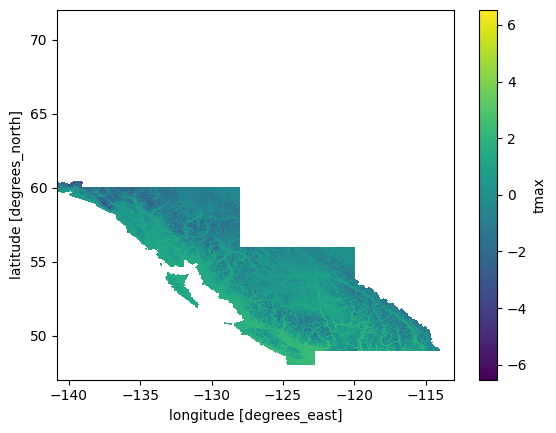

In [67]:
x = xr.open_dataset('/home/sbeale/tmax_north_south_train_test/prism_train.nc')
x.tmax.plot(cmap='viridis')

In [68]:
prism_pt = np.array(prism.tmax)
worldclim_pt = np.array(worldclim.tmax)
coast_pt = np.array(coast.dist)
dem_pt = np.array(dem.dem)
lat_pt = np.array(lat.lat)
lon_pt = np.array(lon.lon)

In [69]:
prism_test_pt = np.array(prism_test.tmax)
worldclim_test_pt = np.array(worldclim_test.tmax)
coast_test_pt = np.array(coast_test.dist)
dem_test_pt = np.array(dem_test.dem)
lat_test_pt = np.array(lat_test.lat)
lon_test_pt = np.array(lon_test.lon)

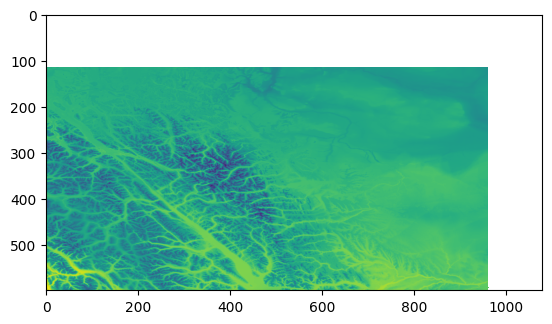

In [70]:
plt.imshow(prism_test_pt)

In [71]:
x_fine = np.arange(0,prism_pt.shape[0]-128, 8)
y_fine = np.arange(0,prism_pt.shape[1]-128, 8)

x_coarse = np.arange(0,worldclim_pt.shape[0]-32, 2)
y_coarse = np.arange(0,worldclim_pt.shape[1]-32, 2)

In [72]:
x_fine_test= np.arange(0,prism_test_pt.shape[0]-128, 8)
y_fine_test = np.arange(0,prism_test_pt.shape[1]-128, 8)

x_coarse_test = np.arange(0,worldclim_test_pt.shape[0]-32, 2)
y_coarse_test = np.arange(0,worldclim_test_pt.shape[1]-32, 2)

In [73]:
tiles_fine_prism = []
tiles_fine_coast = []
tiles_fine_dem = []
tiles_fine_lat = []
tiles_fine_lon = []
for i in range(0, len(y_fine)):
    prism = prism_pt[:,0+y_fine[i]:128+y_fine[i]]
    coast = coast_pt[:,0+y_fine[i]:128+y_fine[i]]
    dem = dem_pt[:,0+y_fine[i]:128+y_fine[i]]
    lat = lat_pt[:,0+y_fine[i]:128+y_fine[i]]
    lon = lon_pt[:,0+y_fine[i]:128+y_fine[i]]
    for j in range(0, len(x_fine)):
        tiles_fine_prism.append(prism[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_coast.append(coast[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_dem.append(dem[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_lat.append(lat[0+x_fine[j]:128+x_fine[j]])
        tiles_fine_lon.append(lon[0+x_fine[j]:128+x_fine[j]])

In [74]:
tiles_fine_prism_test = []
tiles_fine_coast_test = []
tiles_fine_dem_test = []
tiles_fine_lat_test = []
tiles_fine_lon_test = []
for i in range(0, len(y_fine_test)):
    prism = prism_test_pt[:,0+y_fine_test[i]:128+y_fine_test[i]]
    coast = coast_test_pt[:,0+y_fine_test[i]:128+y_fine_test[i]]
    dem = dem_test_pt[:,0+y_fine_test[i]:128+y_fine_test[i]]
    lat = lat_test_pt[:,0+y_fine_test[i]:128+y_fine_test[i]]
    lon = lon_test_pt[:,0+y_fine_test[i]:128+y_fine_test[i]]
    for j in range(0, len(x_fine_test)):
        tiles_fine_prism_test.append(prism[0+x_fine_test[j]:128+x_fine_test[j]])
        tiles_fine_coast_test.append(coast[0+x_fine_test[j]:128+x_fine_test[j]])
        tiles_fine_dem_test.append(dem[0+x_fine_test[j]:128+x_fine_test[j]])
        tiles_fine_lat_test.append(lat[0+x_fine_test[j]:128+x_fine_test[j]])
        tiles_fine_lon_test.append(lon[0+x_fine_test[j]:128+x_fine_test[j]])

In [75]:
tiles_coarse_worldclim = []
for i in range(0, len(y_coarse)):
    worldclim = worldclim_pt[:,0+y_coarse[i]:32+y_coarse[i]]
    for j in range(0, len(x_fine)):
        tiles_coarse_worldclim.append(worldclim[0+x_coarse[j]:32+x_coarse[j]])

In [76]:
tiles_coarse_worldclim_test = []
for i in range(0, len(y_coarse_test)):
    worldclim = worldclim_test_pt[:,0+y_coarse_test[i]:32+y_coarse_test[i]]
    for j in range(0, len(x_fine_test)):
        tiles_coarse_worldclim_test.append(worldclim[0+x_coarse_test[j]:32+x_coarse_test[j]])

In [77]:
prism_pt.shape

(2996, 3332)

In [78]:
len(tiles_fine_prism)

143959

In [79]:
np.nanmean((tiles_fine_prism_test[100]))

-1.0969162

In [80]:
# create for all covariates 
# worldclim and HR 
# calculate which tiles have NAN values based on PRISM grid and then do the same to the other ones  
# throw out ones with all nan 


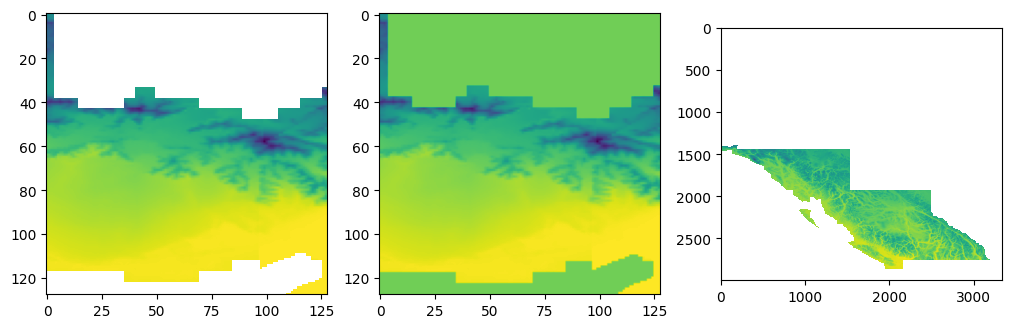

In [81]:
i = 170
fig, ax = plt.subplots(1, 3, layout='constrained', figsize=(10, 7))

pc1 = ax[0].imshow(tiles_fine_prism[i])

pc1 = ax[1].imshow(np.nan_to_num(tiles_fine_prism[i], nan=np.nanmean(tiles_fine_prism[i])))
pc3 = ax[2].imshow(prism_pt)

In [82]:
size_fine = 128*128
size_coarse = 32*32

good_tiles_prism = []
good_tiles_dem = []
good_tiles_coast = []
good_tiles_lat = []
good_tiles_lon = []

good_tiles_worldclim = []

for i in range(0, len(tiles_fine_prism)):
    ind = np.argwhere(np.isnan(tiles_fine_prism[i]))
    percent_nan_prism = ind.shape[0]/size_fine *100
    ind = np.argwhere(np.isnan(tiles_coarse_worldclim[i]))
    percent_nan_worldclim = ind.shape[0]/size_coarse *100
    if ((percent_nan_prism == 0) & (percent_nan_worldclim==0)):
        good_tiles_prism.append(tiles_fine_prism[i])
        good_tiles_dem.append(tiles_fine_dem[i])
        good_tiles_coast.append(tiles_fine_coast[i])
        good_tiles_lat.append(tiles_fine_lat[i])
        good_tiles_lon.append(tiles_fine_lon[i])
        
        good_tiles_worldclim.append(tiles_coarse_worldclim[i])
    elif ((percent_nan_prism <= 25) & (percent_nan_worldclim <= 25)):
        
        good_tiles_prism.append(np.nan_to_num(tiles_fine_prism[i], nan=np.nanmean(tiles_fine_prism[i])))
        
        good_tiles_worldclim.append(np.nan_to_num(tiles_coarse_worldclim[i], nan=np.nanmean(tiles_coarse_worldclim[i])))
                
        good_tiles_dem.append(np.nan_to_num(tiles_fine_dem[i], nan=np.nanmean(tiles_fine_dem[i])))
        good_tiles_coast.append(np.nan_to_num(tiles_fine_coast[i], nan=np.nanmean(tiles_fine_coast[i])))
        good_tiles_lat.append(np.nan_to_num(tiles_fine_lat[i], nan=np.nanmean(tiles_fine_lat[i])))
        good_tiles_lon.append(np.nan_to_num(tiles_fine_lon[i], nan=np.nanmean(tiles_fine_lon[i])))

In [83]:
good_tiles_prism_test = []
good_tiles_dem_test = []
good_tiles_coast_test = []
good_tiles_lat_test = []
good_tiles_lon_test = []

good_tiles_worldclim_test = []

for i in range(0, len(tiles_fine_prism_test)):
    ind = np.argwhere(np.isnan(tiles_fine_prism_test[i]))
    percent_nan_prism = ind.shape[0]/size_fine *100
    ind = np.argwhere(np.isnan(tiles_coarse_worldclim_test[i]))
    percent_nan_worldclim = ind.shape[0]/size_coarse *100
    if ((percent_nan_prism == 0) & (percent_nan_worldclim==0)):
        good_tiles_prism_test.append(tiles_fine_prism_test[i])
        good_tiles_dem_test.append(tiles_fine_dem_test[i])
        good_tiles_coast_test.append(tiles_fine_coast_test[i])
        good_tiles_lat_test.append(tiles_fine_lat_test[i])
        good_tiles_lon_test.append(tiles_fine_lon_test[i])
        
        good_tiles_worldclim_test.append(tiles_coarse_worldclim_test[i])
    elif ((percent_nan_prism <= 25) & (percent_nan_worldclim <= 25)):
        
        good_tiles_prism_test.append(np.nan_to_num(tiles_fine_prism_test[i], nan=np.nanmean(tiles_fine_prism_test[i])))
        
        good_tiles_worldclim_test.append(np.nan_to_num(tiles_coarse_worldclim_test[i], nan=np.nanmean(tiles_coarse_worldclim_test[i])))
                
        good_tiles_dem_test.append(np.nan_to_num(tiles_fine_dem_test[i], nan=np.nanmean(tiles_fine_dem_test[i])))
        good_tiles_coast_test.append(np.nan_to_num(tiles_fine_coast_test[i], nan=np.nanmean(tiles_fine_coast_test[i])))
        good_tiles_lat_test.append(np.nan_to_num(tiles_fine_lat_test[i], nan=np.nanmean(tiles_fine_lat_test[i])))
        good_tiles_lon_test.append(np.nan_to_num(tiles_fine_lon_test[i], nan=np.nanmean(tiles_fine_lon_test[i])))

In [84]:
tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_prism))]
good_tiles_prism = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)
torch.save(good_tiles_prism, '/home/sbeale/tmax_north_south_train_test/prism_train.pt')

del(good_tiles_prism)
del(tiles_unsq)

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_worldclim))]
good_tiles_worldclim = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)
torch.save(good_tiles_worldclim, '/home/sbeale/tmax_north_south_train_test/worldclim_train.pt')

del(good_tiles_worldclim)
del(tiles_unsq)

In [85]:
tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_dem))]
good_tiles_dem = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del(tiles_unsq)

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_coast))]
good_tiles_coast = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del(tiles_unsq)

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_lat))]
good_tiles_lat = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del(tiles_unsq)

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_lon))]
good_tiles_lon = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)


del(tiles_unsq)

In [86]:
x = torch.cat((good_tiles_dem, good_tiles_lat, good_tiles_lon, good_tiles_coast), dim=1)
x.shape

torch.Size([19402, 4, 128, 128])

In [87]:
torch.save(x, '/home/sbeale/tmax_north_south_train_test/HR_covariates_train.pt')

del(x)
del(good_tiles_dem)
del(good_tiles_lat)
del(good_tiles_lon)
del(good_tiles_coast)

In [88]:
tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_prism_test))]
good_tiles_prism_test = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)
torch.save(good_tiles_prism_test, '/home/sbeale/tmax_north_south_train_test/prism_test.pt')

del(good_tiles_prism_test)
del(tiles_unsq)

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_worldclim_test))]
good_tiles_worldclim_test = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)
torch.save(good_tiles_worldclim_test, '/home/sbeale/tmax_north_south_train_test/worldclim_test.pt')

del(good_tiles_worldclim_test)
del(tiles_unsq)

In [89]:
tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_dem_test))]
good_tiles_dem_test = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del(tiles_unsq)

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_coast_test))]
good_tiles_coast_test = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del(tiles_unsq)

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_lat_test))]
good_tiles_lat_test = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)

del(tiles_unsq)

tiles_unsq = [x.unsqueeze(0) for x in torch.from_numpy(np.array(good_tiles_lon_test))]
good_tiles_lon_test = torch.cat(tiles_unsq, dim = 0).unsqueeze(1)


del(tiles_unsq)

In [90]:
x = torch.cat((good_tiles_dem_test, good_tiles_lat_test, good_tiles_lon_test, good_tiles_coast_test), dim=1)
x.shape

torch.Size([5226, 4, 128, 128])

In [91]:
torch.save(x, '/home/sbeale/tmax_north_south_train_test/HR_covariates_test.pt')

del(x)
del(good_tiles_dem_test)
del(good_tiles_lat_test)
del(good_tiles_lon_test)
del(good_tiles_coast_test)